# Example: Loading a Survival Probability Tensor

This file demonstrates how to use MUTE to load a survival probability tensor that exists in a file and plots it as a survival probability matrix.

If underground fluxes and intensities are being calculated, the loading of the survival probability tensor will be done automatically by MUTE (or one will be calculated if it is not already stored in a file), and this does not usually need to be done manually by the user. However, it is sometimes good to check that the propagation and calculation of the survival probabilities give the expected result, and so this can be done with the ``mtp.load_survival_probability_tensor_from_file()`` function.

## Import Packages

In [1]:
import mute.constants as mtc
import mute.propagation as mtp

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(True)
mtc.set_directory("mute/data")
mtc.set_lab("Default")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_density(2.65)
mtc.set_n_muon(1000)

## Load the Tensor from the File

The function can take a Boolean ``force`` parameter. If this parameter is set to ``True`` and the file containing the tensor does not already exist, MUTE will force muons to be propagated in order to calculate the required file (by running ``mtp.calc_survival_probability_tensor()``, which will call ``mtp.propagate_muons()``, based on the global constants set above). It will also create any directories it needs to to store the file. If this parameter is not set, or is set to ``False``, and the file containing the tensor does not already exist, MUTE will prompt whether or not the propagation should be run (and whether any directories should be created). If any of the prompts are answered with anything other than ``y`` or ``Y``, the survival probabilities will not be calculated / written to the file.

With the constants set above, MUTE will look for a file in the ``"mute/data/survival_probabilities/"`` directory called ``Default_rock_1000_Survival_Probabilities.txt``, where ``1000`` is the number of muons, indicating the statistics of the file.

In [3]:
survival_probability_tensor = mtp.load_survival_probability_tensor_from_file()

Loading survival probabilities from mute/data/survival_probabilities/rock_2.65_1000_Survival_Probabilities.txt.
Loaded survival probabilities.


## Plot the Survival Probability Matrix

Sum over the slant depths and plot the matrix against the surface energy grid and underground energy grid.

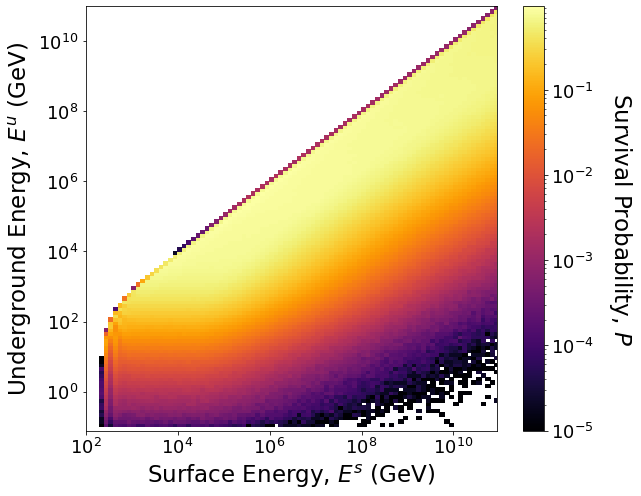

In [4]:
fig = plt.figure(figsize = (9, 7))
ax  = fig.add_subplot(111)

# Convert the energy grids from [MeV] to [GeV] for plotting

X, Y = np.meshgrid(mtc.energies/1e3, mtc.energies/1e3)

# Sum over the slant depths to plot against (surface energy grid, underground energy grid)

cbar = plt.colorbar(ax.pcolormesh(X, Y, np.sum(survival_probability_tensor, axis = 1).T, norm = LogNorm(), cmap = "inferno", shading = "auto"))
cbar.set_label("Survival Probability, $P$", fontsize = 23, rotation = 270, labelpad = 40)
cbar.ax.tick_params(axis = "both", which = "major", labelsize = 18)

ax.set_xlabel(r"Surface Energy, $E^s$ (GeV)", fontsize = 23)
ax.set_ylabel(r"Underground Energy, $E^u$ (GeV)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.yaxis.offsetText.set_fontsize(16)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e2, np.max(mtc.energies)/1e3])

plt.tight_layout()
plt.show()